In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from tqdm import tqdm
from r_a_script import initialize_parameters, define_param_sets, solve_ode, get_states, calculate_durations, update_noise
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors

In [3]:
# def initialize_parameters():
#     # Define fixed parameters and initial conditions
#     params = {
#         'x_0': 5, 'r_0': 0.5, 'k': 15.0, 'theta': 0.05, 'sigma': 0.25, 
#         'dt': 1, 'fin': 60000, 'r0': 0.0, 'a0': 0.0
#     }
#     params['num_steps'] = int(params['fin'] / params['dt'])
#     params['t'] = np.linspace(0, params['fin'], params['num_steps'])
#     print(f"Parameters initialized: {params}")
#     return params

In [4]:
def define_param_sets():
    # Define ranges for I and w
    I_values = np.linspace(1.4, 4, num=10)  # Adjust 'num' for the number of steps in the range
    w_values = np.linspace(3.5, 7.5, num=10)  # Adjust 'num' for the number of steps in the range

    # Create a grid of parameter sets with varying I and w
    param_sets = [{'w': w, 'b': 1.0, 'I': I, 'name': f'ParamSet_w{w}_I{I}'} for w in w_values for I in I_values]
    print(f"Param sets: {param_sets}")
    return param_sets


In [57]:
# params = initialize_parameters()
# param_sets = define_param_sets()
# print(len(params), len(param_sets))

In [58]:
def get_prob_up_down():
    # Initialize parameters
    params = initialize_parameters()
    # xi = np.zeros(params['num_steps'])
    # noise = update_noise(xi, params['theta'], params['dt'], params['sigma'], params['num_steps'])?
    param_sets = define_param_sets()

    # Initialize an empty list to store the results
    results = []

    # Iterate over each parameter set
    for idx, param_set in enumerate(param_sets):
        # Solve the ODE for the current parameter set
        r_values, a_values = solve_ode(params['r0'], params['a0'], params, param_set)
        states = get_states(r_values, 0.5)

        # Calculate durations for UP and DOWN states
        up_durations, down_durations = calculate_durations(states, params['dt'])

        # Calculate the ratio of UP to DOWN durations
        total_up_duration = sum(up_durations)
        total_down_duration = sum(down_durations)
        up_down_ratio = float(total_up_duration) / total_down_duration if total_down_duration != 0 else np.nan

        # Store the results
        results.append({
            'I': param_set['I'],
            'w': param_set['w'],
            'b': param_set['b'],
            'P(UP):P(DOWN)': round(up_down_ratio, 2)
        })

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    # Construct a unique file name based on parameter ranges, dt, and fin
    file_name = f'results_dt{params["dt"]}_fin{params["fin"]}.csv'

    # Save the results to a CSV file
    results_df.to_csv(file_name, index=False)

    return results_df

# Call the function and get the results DataFrame
results_df = get_prob_up_down()

Parameters initialized: {'x_0': 5, 'r_0': 0.5, 'k': 15.0, 'theta': 0.05, 'sigma': 0.25, 'dt': 1, 'fin': 60000, 'r0': 0.0, 'a0': 0.0, 'num_steps': 60000, 't': array([0.00000000e+00, 1.00001667e+00, 2.00003333e+00, ...,
       5.99980000e+04, 5.99990000e+04, 6.00000000e+04])}
Variance in OU noise: 0.06237704646969074
Param sets: [{'w': 3.5, 'b': 1.0, 'I': 1.4, 'name': 'ParamSet_w3.5_I1.4'}, {'w': 3.5, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w3.5_I1.6888888888888889'}, {'w': 3.5, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w3.5_I1.9777777777777779'}, {'w': 3.5, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w3.5_I2.2666666666666666'}, {'w': 3.5, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w3.5_I2.5555555555555554'}, {'w': 3.5, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w3.5_I2.8444444444444446'}, {'w': 3.5, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w3.5_I3.1333333333333333'}, {'w': 3.5, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'P

Simulating ParamSet_w3.5_I1.4: 100%|██████████| 60000/60000 [00:00<00:00, 218775.99it/s]


Solving ODE for parameter set: {'w': 3.5, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w3.5_I1.6888888888888889'}


Simulating ParamSet_w3.5_I1.6888888888888889: 100%|██████████| 60000/60000 [00:00<00:00, 200165.47it/s]


Solving ODE for parameter set: {'w': 3.5, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w3.5_I1.9777777777777779'}


Simulating ParamSet_w3.5_I1.9777777777777779: 100%|██████████| 60000/60000 [00:00<00:00, 223974.94it/s]


Solving ODE for parameter set: {'w': 3.5, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w3.5_I2.2666666666666666'}


Simulating ParamSet_w3.5_I2.2666666666666666: 100%|██████████| 60000/60000 [00:00<00:00, 221425.08it/s]


Solving ODE for parameter set: {'w': 3.5, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w3.5_I2.5555555555555554'}


Simulating ParamSet_w3.5_I2.5555555555555554: 100%|██████████| 60000/60000 [00:00<00:00, 221521.56it/s]


Solving ODE for parameter set: {'w': 3.5, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w3.5_I2.8444444444444446'}


Simulating ParamSet_w3.5_I2.8444444444444446: 100%|██████████| 60000/60000 [00:00<00:00, 219243.71it/s]


Solving ODE for parameter set: {'w': 3.5, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w3.5_I3.1333333333333333'}


Simulating ParamSet_w3.5_I3.1333333333333333: 100%|██████████| 60000/60000 [00:00<00:00, 220736.00it/s]


Solving ODE for parameter set: {'w': 3.5, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'ParamSet_w3.5_I3.4222222222222225'}


Simulating ParamSet_w3.5_I3.4222222222222225: 100%|██████████| 60000/60000 [00:00<00:00, 221622.22it/s]


Solving ODE for parameter set: {'w': 3.5, 'b': 1.0, 'I': 3.7111111111111112, 'name': 'ParamSet_w3.5_I3.7111111111111112'}


Simulating ParamSet_w3.5_I3.7111111111111112: 100%|██████████| 60000/60000 [00:00<00:00, 222124.36it/s]


Solving ODE for parameter set: {'w': 3.5, 'b': 1.0, 'I': 4.0, 'name': 'ParamSet_w3.5_I4.0'}


Simulating ParamSet_w3.5_I4.0: 100%|██████████| 60000/60000 [00:00<00:00, 208265.50it/s]


Solving ODE for parameter set: {'w': 3.9444444444444446, 'b': 1.0, 'I': 1.4, 'name': 'ParamSet_w3.9444444444444446_I1.4'}


Simulating ParamSet_w3.9444444444444446_I1.4: 100%|██████████| 60000/60000 [00:00<00:00, 221247.93it/s]


Solving ODE for parameter set: {'w': 3.9444444444444446, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w3.9444444444444446_I1.6888888888888889'}


Simulating ParamSet_w3.9444444444444446_I1.6888888888888889: 100%|██████████| 60000/60000 [00:00<00:00, 222623.86it/s]


Solving ODE for parameter set: {'w': 3.9444444444444446, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w3.9444444444444446_I1.9777777777777779'}


Simulating ParamSet_w3.9444444444444446_I1.9777777777777779: 100%|██████████| 60000/60000 [00:00<00:00, 222398.59it/s]


Solving ODE for parameter set: {'w': 3.9444444444444446, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w3.9444444444444446_I2.2666666666666666'}


Simulating ParamSet_w3.9444444444444446_I2.2666666666666666: 100%|██████████| 60000/60000 [00:00<00:00, 221507.72it/s]


Solving ODE for parameter set: {'w': 3.9444444444444446, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w3.9444444444444446_I2.5555555555555554'}


Simulating ParamSet_w3.9444444444444446_I2.5555555555555554: 100%|██████████| 60000/60000 [00:00<00:00, 223249.12it/s]


Solving ODE for parameter set: {'w': 3.9444444444444446, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w3.9444444444444446_I2.8444444444444446'}


Simulating ParamSet_w3.9444444444444446_I2.8444444444444446: 100%|██████████| 60000/60000 [00:00<00:00, 220840.79it/s]


Solving ODE for parameter set: {'w': 3.9444444444444446, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w3.9444444444444446_I3.1333333333333333'}


Simulating ParamSet_w3.9444444444444446_I3.1333333333333333: 100%|██████████| 60000/60000 [00:00<00:00, 222699.71it/s]


Solving ODE for parameter set: {'w': 3.9444444444444446, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'ParamSet_w3.9444444444444446_I3.4222222222222225'}


Simulating ParamSet_w3.9444444444444446_I3.4222222222222225: 100%|██████████| 60000/60000 [00:00<00:00, 203183.03it/s]


Solving ODE for parameter set: {'w': 3.9444444444444446, 'b': 1.0, 'I': 3.7111111111111112, 'name': 'ParamSet_w3.9444444444444446_I3.7111111111111112'}


Simulating ParamSet_w3.9444444444444446_I3.7111111111111112: 100%|██████████| 60000/60000 [00:00<00:00, 224304.73it/s]


Solving ODE for parameter set: {'w': 3.9444444444444446, 'b': 1.0, 'I': 4.0, 'name': 'ParamSet_w3.9444444444444446_I4.0'}


Simulating ParamSet_w3.9444444444444446_I4.0: 100%|██████████| 60000/60000 [00:00<00:00, 221875.45it/s]


Solving ODE for parameter set: {'w': 4.388888888888889, 'b': 1.0, 'I': 1.4, 'name': 'ParamSet_w4.388888888888889_I1.4'}


Simulating ParamSet_w4.388888888888889_I1.4: 100%|██████████| 60000/60000 [00:00<00:00, 222293.88it/s]


Solving ODE for parameter set: {'w': 4.388888888888889, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w4.388888888888889_I1.6888888888888889'}


Simulating ParamSet_w4.388888888888889_I1.6888888888888889: 100%|██████████| 60000/60000 [00:00<00:00, 223218.23it/s]


Solving ODE for parameter set: {'w': 4.388888888888889, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w4.388888888888889_I1.9777777777777779'}


Simulating ParamSet_w4.388888888888889_I1.9777777777777779: 100%|██████████| 60000/60000 [00:00<00:00, 222112.01it/s]


Solving ODE for parameter set: {'w': 4.388888888888889, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w4.388888888888889_I2.2666666666666666'}


Simulating ParamSet_w4.388888888888889_I2.2666666666666666: 100%|██████████| 60000/60000 [00:00<00:00, 225116.55it/s]


Solving ODE for parameter set: {'w': 4.388888888888889, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w4.388888888888889_I2.5555555555555554'}


Simulating ParamSet_w4.388888888888889_I2.5555555555555554: 100%|██████████| 60000/60000 [00:00<00:00, 224598.80it/s]


Solving ODE for parameter set: {'w': 4.388888888888889, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w4.388888888888889_I2.8444444444444446'}


Simulating ParamSet_w4.388888888888889_I2.8444444444444446: 100%|██████████| 60000/60000 [00:00<00:00, 218840.67it/s]


Solving ODE for parameter set: {'w': 4.388888888888889, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w4.388888888888889_I3.1333333333333333'}


Simulating ParamSet_w4.388888888888889_I3.1333333333333333: 100%|██████████| 60000/60000 [00:00<00:00, 220010.79it/s]


Solving ODE for parameter set: {'w': 4.388888888888889, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'ParamSet_w4.388888888888889_I3.4222222222222225'}


Simulating ParamSet_w4.388888888888889_I3.4222222222222225: 100%|██████████| 60000/60000 [00:00<00:00, 222274.25it/s]


Solving ODE for parameter set: {'w': 4.388888888888889, 'b': 1.0, 'I': 3.7111111111111112, 'name': 'ParamSet_w4.388888888888889_I3.7111111111111112'}


Simulating ParamSet_w4.388888888888889_I3.7111111111111112: 100%|██████████| 60000/60000 [00:00<00:00, 223155.88it/s]


Solving ODE for parameter set: {'w': 4.388888888888889, 'b': 1.0, 'I': 4.0, 'name': 'ParamSet_w4.388888888888889_I4.0'}


Simulating ParamSet_w4.388888888888889_I4.0: 100%|██████████| 60000/60000 [00:00<00:00, 222845.44it/s]


Solving ODE for parameter set: {'w': 4.833333333333333, 'b': 1.0, 'I': 1.4, 'name': 'ParamSet_w4.833333333333333_I1.4'}


Simulating ParamSet_w4.833333333333333_I1.4: 100%|██████████| 60000/60000 [00:00<00:00, 221299.49it/s]


Solving ODE for parameter set: {'w': 4.833333333333333, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w4.833333333333333_I1.6888888888888889'}


Simulating ParamSet_w4.833333333333333_I1.6888888888888889: 100%|██████████| 60000/60000 [00:00<00:00, 220055.81it/s]


Solving ODE for parameter set: {'w': 4.833333333333333, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w4.833333333333333_I1.9777777777777779'}


Simulating ParamSet_w4.833333333333333_I1.9777777777777779: 100%|██████████| 60000/60000 [00:00<00:00, 223929.90it/s]


Solving ODE for parameter set: {'w': 4.833333333333333, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w4.833333333333333_I2.2666666666666666'}


Simulating ParamSet_w4.833333333333333_I2.2666666666666666: 100%|██████████| 60000/60000 [00:00<00:00, 216749.63it/s]


Solving ODE for parameter set: {'w': 4.833333333333333, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w4.833333333333333_I2.5555555555555554'}


Simulating ParamSet_w4.833333333333333_I2.5555555555555554: 100%|██████████| 60000/60000 [00:00<00:00, 206774.01it/s]


Solving ODE for parameter set: {'w': 4.833333333333333, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w4.833333333333333_I2.8444444444444446'}


Simulating ParamSet_w4.833333333333333_I2.8444444444444446: 100%|██████████| 60000/60000 [00:00<00:00, 221704.62it/s]


Solving ODE for parameter set: {'w': 4.833333333333333, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w4.833333333333333_I3.1333333333333333'}


Simulating ParamSet_w4.833333333333333_I3.1333333333333333: 100%|██████████| 60000/60000 [00:00<00:00, 222483.53it/s]


Solving ODE for parameter set: {'w': 4.833333333333333, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'ParamSet_w4.833333333333333_I3.4222222222222225'}


Simulating ParamSet_w4.833333333333333_I3.4222222222222225: 100%|██████████| 60000/60000 [00:00<00:00, 222637.05it/s]


Solving ODE for parameter set: {'w': 4.833333333333333, 'b': 1.0, 'I': 3.7111111111111112, 'name': 'ParamSet_w4.833333333333333_I3.7111111111111112'}


Simulating ParamSet_w4.833333333333333_I3.7111111111111112: 100%|██████████| 60000/60000 [00:00<00:00, 224057.69it/s]


Solving ODE for parameter set: {'w': 4.833333333333333, 'b': 1.0, 'I': 4.0, 'name': 'ParamSet_w4.833333333333333_I4.0'}


Simulating ParamSet_w4.833333333333333_I4.0: 100%|██████████| 60000/60000 [00:00<00:00, 221614.81it/s]


Solving ODE for parameter set: {'w': 5.277777777777778, 'b': 1.0, 'I': 1.4, 'name': 'ParamSet_w5.277777777777778_I1.4'}


Simulating ParamSet_w5.277777777777778_I1.4: 100%|██████████| 60000/60000 [00:00<00:00, 222595.70it/s]


Solving ODE for parameter set: {'w': 5.277777777777778, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w5.277777777777778_I1.6888888888888889'}


Simulating ParamSet_w5.277777777777778_I1.6888888888888889: 100%|██████████| 60000/60000 [00:00<00:00, 211750.12it/s]


Solving ODE for parameter set: {'w': 5.277777777777778, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w5.277777777777778_I1.9777777777777779'}


Simulating ParamSet_w5.277777777777778_I1.9777777777777779: 100%|██████████| 60000/60000 [00:00<00:00, 225509.71it/s]


Solving ODE for parameter set: {'w': 5.277777777777778, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w5.277777777777778_I2.2666666666666666'}


Simulating ParamSet_w5.277777777777778_I2.2666666666666666: 100%|██████████| 60000/60000 [00:00<00:00, 223722.86it/s]


Solving ODE for parameter set: {'w': 5.277777777777778, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w5.277777777777778_I2.5555555555555554'}


Simulating ParamSet_w5.277777777777778_I2.5555555555555554: 100%|██████████| 60000/60000 [00:00<00:00, 224554.11it/s]


Solving ODE for parameter set: {'w': 5.277777777777778, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w5.277777777777778_I2.8444444444444446'}


Simulating ParamSet_w5.277777777777778_I2.8444444444444446: 100%|██████████| 60000/60000 [00:00<00:00, 224310.13it/s]


Solving ODE for parameter set: {'w': 5.277777777777778, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w5.277777777777778_I3.1333333333333333'}


Simulating ParamSet_w5.277777777777778_I3.1333333333333333: 100%|██████████| 60000/60000 [00:00<00:00, 223994.28it/s]


Solving ODE for parameter set: {'w': 5.277777777777778, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'ParamSet_w5.277777777777778_I3.4222222222222225'}


Simulating ParamSet_w5.277777777777778_I3.4222222222222225: 100%|██████████| 60000/60000 [00:00<00:00, 223818.97it/s]


Solving ODE for parameter set: {'w': 5.277777777777778, 'b': 1.0, 'I': 3.7111111111111112, 'name': 'ParamSet_w5.277777777777778_I3.7111111111111112'}


Simulating ParamSet_w5.277777777777778_I3.7111111111111112: 100%|██████████| 60000/60000 [00:00<00:00, 219286.32it/s]


Solving ODE for parameter set: {'w': 5.277777777777778, 'b': 1.0, 'I': 4.0, 'name': 'ParamSet_w5.277777777777778_I4.0'}


Simulating ParamSet_w5.277777777777778_I4.0: 100%|██████████| 60000/60000 [00:00<00:00, 197310.15it/s]


Solving ODE for parameter set: {'w': 5.722222222222222, 'b': 1.0, 'I': 1.4, 'name': 'ParamSet_w5.722222222222222_I1.4'}


Simulating ParamSet_w5.722222222222222_I1.4: 100%|██████████| 60000/60000 [00:00<00:00, 223899.81it/s]


Solving ODE for parameter set: {'w': 5.722222222222222, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w5.722222222222222_I1.6888888888888889'}


Simulating ParamSet_w5.722222222222222_I1.6888888888888889: 100%|██████████| 60000/60000 [00:00<00:00, 224041.14it/s]


Solving ODE for parameter set: {'w': 5.722222222222222, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w5.722222222222222_I1.9777777777777779'}


Simulating ParamSet_w5.722222222222222_I1.9777777777777779: 100%|██████████| 60000/60000 [00:00<00:00, 223371.58it/s]


Solving ODE for parameter set: {'w': 5.722222222222222, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w5.722222222222222_I2.2666666666666666'}


Simulating ParamSet_w5.722222222222222_I2.2666666666666666: 100%|██████████| 60000/60000 [00:00<00:00, 225085.14it/s]


Solving ODE for parameter set: {'w': 5.722222222222222, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w5.722222222222222_I2.5555555555555554'}


Simulating ParamSet_w5.722222222222222_I2.5555555555555554: 100%|██████████| 60000/60000 [00:00<00:00, 222710.55it/s]


Solving ODE for parameter set: {'w': 5.722222222222222, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w5.722222222222222_I2.8444444444444446'}


Simulating ParamSet_w5.722222222222222_I2.8444444444444446: 100%|██████████| 60000/60000 [00:00<00:00, 222046.36it/s]


Solving ODE for parameter set: {'w': 5.722222222222222, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w5.722222222222222_I3.1333333333333333'}


Simulating ParamSet_w5.722222222222222_I3.1333333333333333: 100%|██████████| 60000/60000 [00:00<00:00, 205661.95it/s]


Solving ODE for parameter set: {'w': 5.722222222222222, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'ParamSet_w5.722222222222222_I3.4222222222222225'}


Simulating ParamSet_w5.722222222222222_I3.4222222222222225: 100%|██████████| 60000/60000 [00:00<00:00, 224888.62it/s]


Solving ODE for parameter set: {'w': 5.722222222222222, 'b': 1.0, 'I': 3.7111111111111112, 'name': 'ParamSet_w5.722222222222222_I3.7111111111111112'}


Simulating ParamSet_w5.722222222222222_I3.7111111111111112: 100%|██████████| 60000/60000 [00:00<00:00, 216929.93it/s]


Solving ODE for parameter set: {'w': 5.722222222222222, 'b': 1.0, 'I': 4.0, 'name': 'ParamSet_w5.722222222222222_I4.0'}


Simulating ParamSet_w5.722222222222222_I4.0: 100%|██████████| 60000/60000 [00:00<00:00, 222569.12it/s]


Solving ODE for parameter set: {'w': 6.166666666666666, 'b': 1.0, 'I': 1.4, 'name': 'ParamSet_w6.166666666666666_I1.4'}


Simulating ParamSet_w6.166666666666666_I1.4: 100%|██████████| 60000/60000 [00:00<00:00, 222560.27it/s]


Solving ODE for parameter set: {'w': 6.166666666666666, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w6.166666666666666_I1.6888888888888889'}


Simulating ParamSet_w6.166666666666666_I1.6888888888888889: 100%|██████████| 60000/60000 [00:00<00:00, 224423.14it/s]


Solving ODE for parameter set: {'w': 6.166666666666666, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w6.166666666666666_I1.9777777777777779'}


Simulating ParamSet_w6.166666666666666_I1.9777777777777779: 100%|██████████| 60000/60000 [00:00<00:00, 221863.72it/s]


Solving ODE for parameter set: {'w': 6.166666666666666, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w6.166666666666666_I2.2666666666666666'}


Simulating ParamSet_w6.166666666666666_I2.2666666666666666: 100%|██████████| 60000/60000 [00:00<00:00, 220422.02it/s]


Solving ODE for parameter set: {'w': 6.166666666666666, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w6.166666666666666_I2.5555555555555554'}


Simulating ParamSet_w6.166666666666666_I2.5555555555555554: 100%|██████████| 60000/60000 [00:00<00:00, 210100.91it/s]


Solving ODE for parameter set: {'w': 6.166666666666666, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w6.166666666666666_I2.8444444444444446'}


Simulating ParamSet_w6.166666666666666_I2.8444444444444446: 100%|██████████| 60000/60000 [00:00<00:00, 215753.79it/s]


Solving ODE for parameter set: {'w': 6.166666666666666, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w6.166666666666666_I3.1333333333333333'}


Simulating ParamSet_w6.166666666666666_I3.1333333333333333: 100%|██████████| 60000/60000 [00:00<00:00, 221981.33it/s]


Solving ODE for parameter set: {'w': 6.166666666666666, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'ParamSet_w6.166666666666666_I3.4222222222222225'}


Simulating ParamSet_w6.166666666666666_I3.4222222222222225: 100%|██████████| 60000/60000 [00:00<00:00, 222711.33it/s]


Solving ODE for parameter set: {'w': 6.166666666666666, 'b': 1.0, 'I': 3.7111111111111112, 'name': 'ParamSet_w6.166666666666666_I3.7111111111111112'}


Simulating ParamSet_w6.166666666666666_I3.7111111111111112: 100%|██████████| 60000/60000 [00:00<00:00, 225009.87it/s]


Solving ODE for parameter set: {'w': 6.166666666666666, 'b': 1.0, 'I': 4.0, 'name': 'ParamSet_w6.166666666666666_I4.0'}


Simulating ParamSet_w6.166666666666666_I4.0: 100%|██████████| 60000/60000 [00:00<00:00, 225222.12it/s]


Solving ODE for parameter set: {'w': 6.611111111111111, 'b': 1.0, 'I': 1.4, 'name': 'ParamSet_w6.611111111111111_I1.4'}


Simulating ParamSet_w6.611111111111111_I1.4: 100%|██████████| 60000/60000 [00:00<00:00, 223593.66it/s]


Solving ODE for parameter set: {'w': 6.611111111111111, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w6.611111111111111_I1.6888888888888889'}


Simulating ParamSet_w6.611111111111111_I1.6888888888888889: 100%|██████████| 60000/60000 [00:00<00:00, 211821.59it/s]


Solving ODE for parameter set: {'w': 6.611111111111111, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w6.611111111111111_I1.9777777777777779'}


Simulating ParamSet_w6.611111111111111_I1.9777777777777779: 100%|██████████| 60000/60000 [00:00<00:00, 225261.63it/s]


Solving ODE for parameter set: {'w': 6.611111111111111, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w6.611111111111111_I2.2666666666666666'}


Simulating ParamSet_w6.611111111111111_I2.2666666666666666: 100%|██████████| 60000/60000 [00:00<00:00, 224592.99it/s]


Solving ODE for parameter set: {'w': 6.611111111111111, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w6.611111111111111_I2.5555555555555554'}


Simulating ParamSet_w6.611111111111111_I2.5555555555555554: 100%|██████████| 60000/60000 [00:00<00:00, 224698.07it/s]


Solving ODE for parameter set: {'w': 6.611111111111111, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w6.611111111111111_I2.8444444444444446'}


Simulating ParamSet_w6.611111111111111_I2.8444444444444446: 100%|██████████| 60000/60000 [00:00<00:00, 225460.21it/s]


Solving ODE for parameter set: {'w': 6.611111111111111, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w6.611111111111111_I3.1333333333333333'}


Simulating ParamSet_w6.611111111111111_I3.1333333333333333: 100%|██████████| 60000/60000 [00:00<00:00, 225620.71it/s]


Solving ODE for parameter set: {'w': 6.611111111111111, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'ParamSet_w6.611111111111111_I3.4222222222222225'}


Simulating ParamSet_w6.611111111111111_I3.4222222222222225: 100%|██████████| 60000/60000 [00:00<00:00, 194719.22it/s]


Solving ODE for parameter set: {'w': 6.611111111111111, 'b': 1.0, 'I': 3.7111111111111112, 'name': 'ParamSet_w6.611111111111111_I3.7111111111111112'}


Simulating ParamSet_w6.611111111111111_I3.7111111111111112: 100%|██████████| 60000/60000 [00:00<00:00, 153848.18it/s]


Solving ODE for parameter set: {'w': 6.611111111111111, 'b': 1.0, 'I': 4.0, 'name': 'ParamSet_w6.611111111111111_I4.0'}


Simulating ParamSet_w6.611111111111111_I4.0: 100%|██████████| 60000/60000 [00:00<00:00, 189494.98it/s]


Solving ODE for parameter set: {'w': 7.055555555555555, 'b': 1.0, 'I': 1.4, 'name': 'ParamSet_w7.055555555555555_I1.4'}


Simulating ParamSet_w7.055555555555555_I1.4: 100%|██████████| 60000/60000 [00:00<00:00, 221118.46it/s]


Solving ODE for parameter set: {'w': 7.055555555555555, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w7.055555555555555_I1.6888888888888889'}


Simulating ParamSet_w7.055555555555555_I1.6888888888888889: 100%|██████████| 60000/60000 [00:00<00:00, 221685.87it/s]


Solving ODE for parameter set: {'w': 7.055555555555555, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w7.055555555555555_I1.9777777777777779'}


Simulating ParamSet_w7.055555555555555_I1.9777777777777779: 100%|██████████| 60000/60000 [00:00<00:00, 223438.02it/s]


Solving ODE for parameter set: {'w': 7.055555555555555, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w7.055555555555555_I2.2666666666666666'}


Simulating ParamSet_w7.055555555555555_I2.2666666666666666: 100%|██████████| 60000/60000 [00:00<00:00, 221875.45it/s]


Solving ODE for parameter set: {'w': 7.055555555555555, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w7.055555555555555_I2.5555555555555554'}


Simulating ParamSet_w7.055555555555555_I2.5555555555555554: 100%|██████████| 60000/60000 [00:00<00:00, 222852.54it/s]


Solving ODE for parameter set: {'w': 7.055555555555555, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w7.055555555555555_I2.8444444444444446'}


Simulating ParamSet_w7.055555555555555_I2.8444444444444446: 100%|██████████| 60000/60000 [00:00<00:00, 222504.77it/s]


Solving ODE for parameter set: {'w': 7.055555555555555, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w7.055555555555555_I3.1333333333333333'}


Simulating ParamSet_w7.055555555555555_I3.1333333333333333: 100%|██████████| 60000/60000 [00:00<00:00, 209065.70it/s]


Solving ODE for parameter set: {'w': 7.055555555555555, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'ParamSet_w7.055555555555555_I3.4222222222222225'}


Simulating ParamSet_w7.055555555555555_I3.4222222222222225: 100%|██████████| 60000/60000 [00:00<00:00, 223951.62it/s]


Solving ODE for parameter set: {'w': 7.055555555555555, 'b': 1.0, 'I': 3.7111111111111112, 'name': 'ParamSet_w7.055555555555555_I3.7111111111111112'}


Simulating ParamSet_w7.055555555555555_I3.7111111111111112: 100%|██████████| 60000/60000 [00:00<00:00, 223925.71it/s]


Solving ODE for parameter set: {'w': 7.055555555555555, 'b': 1.0, 'I': 4.0, 'name': 'ParamSet_w7.055555555555555_I4.0'}


Simulating ParamSet_w7.055555555555555_I4.0: 100%|██████████| 60000/60000 [00:00<00:00, 224162.67it/s]


Solving ODE for parameter set: {'w': 7.5, 'b': 1.0, 'I': 1.4, 'name': 'ParamSet_w7.5_I1.4'}


Simulating ParamSet_w7.5_I1.4: 100%|██████████| 60000/60000 [00:00<00:00, 225521.43it/s]


Solving ODE for parameter set: {'w': 7.5, 'b': 1.0, 'I': 1.6888888888888889, 'name': 'ParamSet_w7.5_I1.6888888888888889'}


Simulating ParamSet_w7.5_I1.6888888888888889: 100%|██████████| 60000/60000 [00:00<00:00, 222888.47it/s]


Solving ODE for parameter set: {'w': 7.5, 'b': 1.0, 'I': 1.9777777777777779, 'name': 'ParamSet_w7.5_I1.9777777777777779'}


Simulating ParamSet_w7.5_I1.9777777777777779: 100%|██████████| 60000/60000 [00:00<00:00, 222261.69it/s]


Solving ODE for parameter set: {'w': 7.5, 'b': 1.0, 'I': 2.2666666666666666, 'name': 'ParamSet_w7.5_I2.2666666666666666'}


Simulating ParamSet_w7.5_I2.2666666666666666: 100%|██████████| 60000/60000 [00:00<00:00, 205512.47it/s]


Solving ODE for parameter set: {'w': 7.5, 'b': 1.0, 'I': 2.5555555555555554, 'name': 'ParamSet_w7.5_I2.5555555555555554'}


Simulating ParamSet_w7.5_I2.5555555555555554: 100%|██████████| 60000/60000 [00:00<00:00, 208285.49it/s]


Solving ODE for parameter set: {'w': 7.5, 'b': 1.0, 'I': 2.8444444444444446, 'name': 'ParamSet_w7.5_I2.8444444444444446'}


Simulating ParamSet_w7.5_I2.8444444444444446: 100%|██████████| 60000/60000 [00:00<00:00, 222162.80it/s]


Solving ODE for parameter set: {'w': 7.5, 'b': 1.0, 'I': 3.1333333333333333, 'name': 'ParamSet_w7.5_I3.1333333333333333'}


Simulating ParamSet_w7.5_I3.1333333333333333: 100%|██████████| 60000/60000 [00:00<00:00, 222176.13it/s]


Solving ODE for parameter set: {'w': 7.5, 'b': 1.0, 'I': 3.4222222222222225, 'name': 'ParamSet_w7.5_I3.4222222222222225'}


Simulating ParamSet_w7.5_I3.4222222222222225: 100%|██████████| 60000/60000 [00:00<00:00, 218649.40it/s]


Solving ODE for parameter set: {'w': 7.5, 'b': 1.0, 'I': 3.7111111111111112, 'name': 'ParamSet_w7.5_I3.7111111111111112'}


Simulating ParamSet_w7.5_I3.7111111111111112: 100%|██████████| 60000/60000 [00:00<00:00, 222764.96it/s]


Solving ODE for parameter set: {'w': 7.5, 'b': 1.0, 'I': 4.0, 'name': 'ParamSet_w7.5_I4.0'}


Simulating ParamSet_w7.5_I4.0: 100%|██████████| 60000/60000 [00:00<00:00, 223611.74it/s]


In [41]:
len(results_df[results_df["P(UP):P(DOWN)"]>100])

265

In [8]:
import pandas as pd

df_hopf = pd.read_csv('i-w_hopf1.dat', delim_whitespace=True, header=None)
df_saddle = pd.read_csv('saddle_i-w.dat', delim_whitespace=True, header=None)

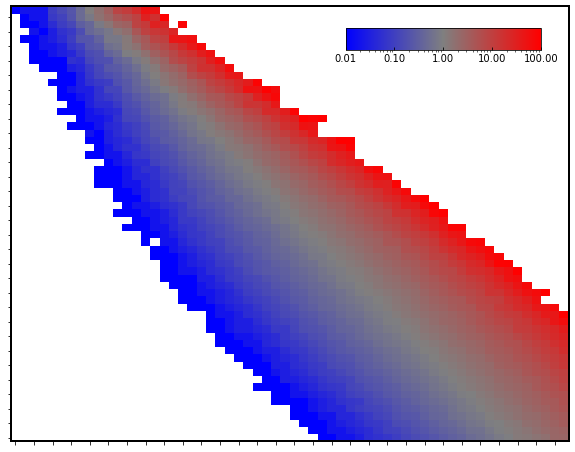

In [24]:
def plot_heatmap(data, file_name):
    # Filter the data to include only rows where P(UP):P(DOWN) is in the range [0.01, 100]
    filtered_data = data[(data['P(UP):P(DOWN)'] >= 0.01) & (data['P(UP):P(DOWN)'] <= 100)]

    # Create a pivot table for the heatmap
    pivot_table = filtered_data.pivot("w", "I", "P(UP):P(DOWN)")

    # Define the color map and normalization
    cmap = mcolors.LinearSegmentedColormap.from_list(
        "custom_colormap", 
        ["blue", "grey", "red"]
    )
    norm = mcolors.LogNorm(vmin=0.01, vmax=100)

    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    heatmap = sns.heatmap(pivot_table, annot=False, fmt=".1f", cmap=cmap, norm=norm, ax=ax, cbar=False)

    # Reverse the y-axis
    ax.invert_yaxis()

    # Add top, bottom, left, right strips (borders) around the plot
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(2)

    # Remove the x-tick and y-tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_ylabel('')
    ax.set_xlabel('')

    # Labels and title
    # plt.title("P(UP):P(DOWN) Heatmap on I-w Grid")

    # # Adjust colorbar ticks
    # cbar = ax.collections[0].colorbar
    # cbar.ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
    # cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

    # Create an inset axis for the colorbar
    cax = ax.inset_axes([0.6, 0.9, 0.35, 0.05])  # x, y, width, height as fractions of parent axis
    cbar = fig.colorbar(heatmap.collections[0], cax=cax, orientation='horizontal')
    cbar.ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
    cbar.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
    cbar.ax.tick_params(axis='x', direction='in')

    # Save the plot as SVG and PNG
    svg_file_name = file_name + ".svg"
    png_file_name = file_name + ".png"
    plt.savefig(svg_file_name, format='svg')
    # plt.savefig(png_file_name, format='png')

    return plt

file_path = "results_dt0.1_fin60000_tau_20.csv"
results_df = pd.read_csv(file_path)
# Example usage
I_range = f'{results_df["I"].min()}-{results_df["I"].max()}'
w_range = f'{results_df["w"].min()}-{results_df["w"].max()}'
file_name = f"./plots/final/heatmap_I_{I_range}_w_{w_range}"
heatmap_plot = plot_heatmap(results_df, file_name)
heatmap_plot.show()



